# Loading Datase
## First, let's import the required libraries and load the Titanic dataset. 

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [200]:
df = pd.read_csv(r'C:\Users\RebelAshif\Downloads\titanic\train.csv')

In [201]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Basic Data Exploration
## Let’s start by understanding the structure of the dataset. 

In [202]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
# Summary statistics for numerical features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. Missing Values Handling
## Check for missing values and decide how to handle them

In [205]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [206]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [207]:
# Handle missing values: Example (impute Age with the median)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [208]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [209]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

# 4. Visualizing the Data

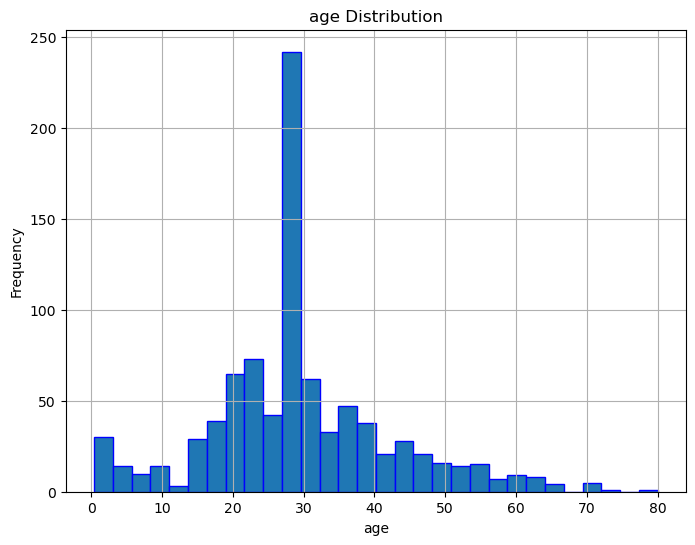

In [210]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=30, edgecolor='blue')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


In [211]:
df['Survived'] = df['Survived'].astype('category')

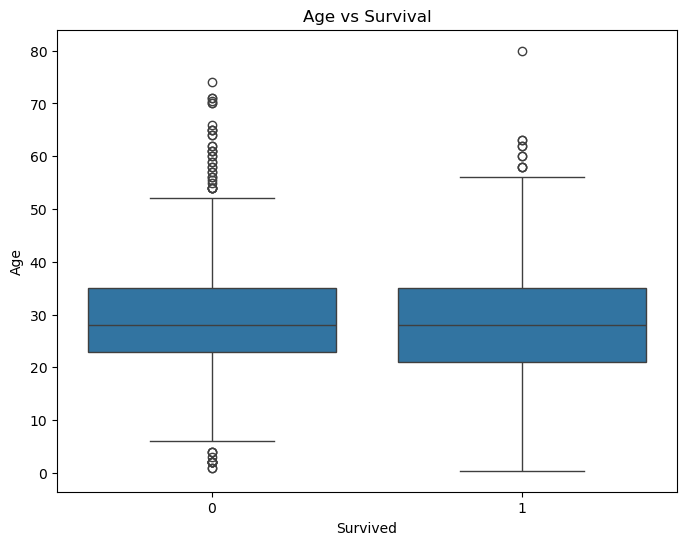

In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


In [213]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

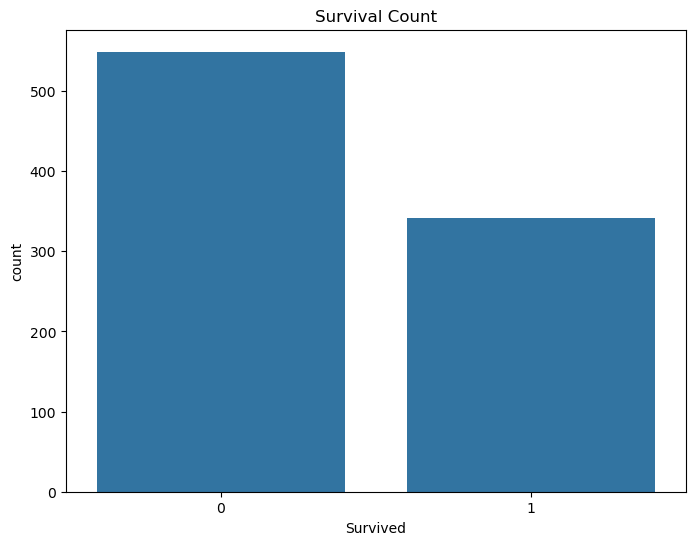

In [214]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


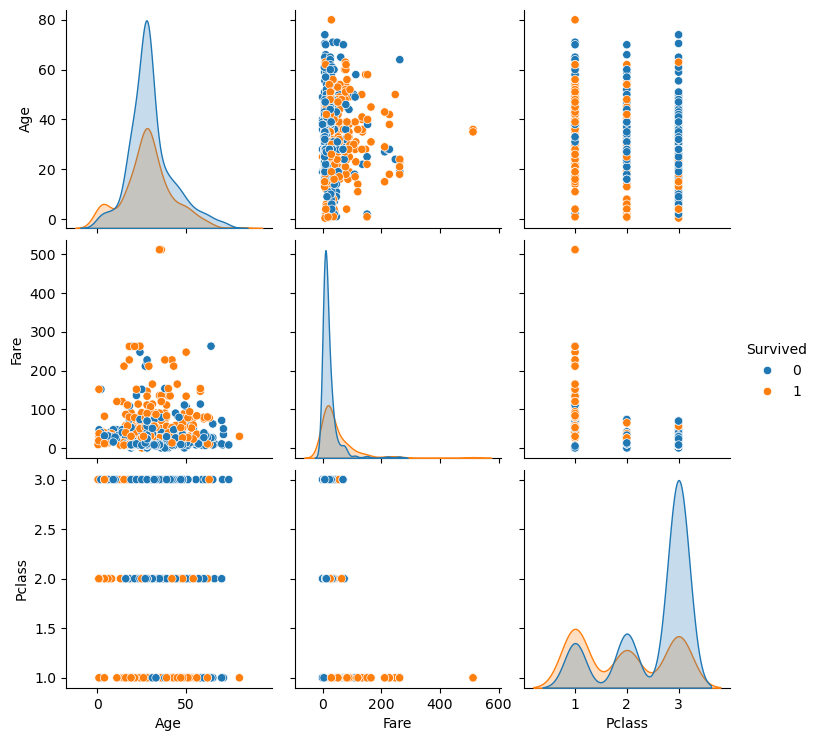

In [215]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()


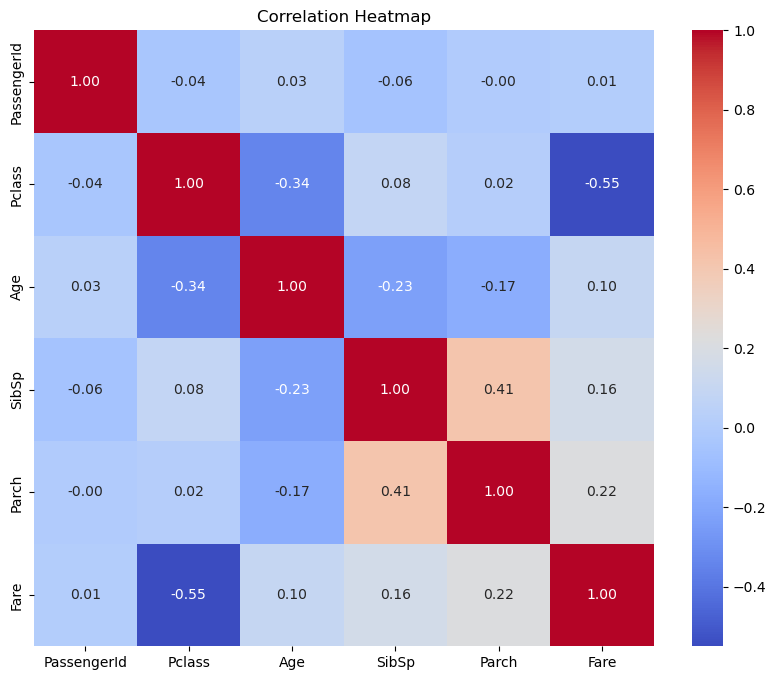

In [216]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for correlation of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



# Categorical Variable Analysis

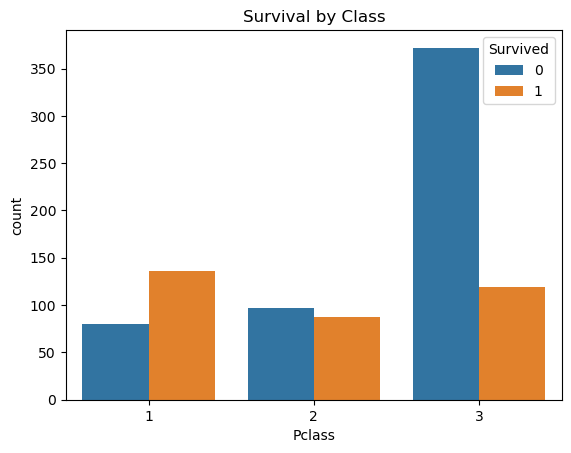

In [217]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()


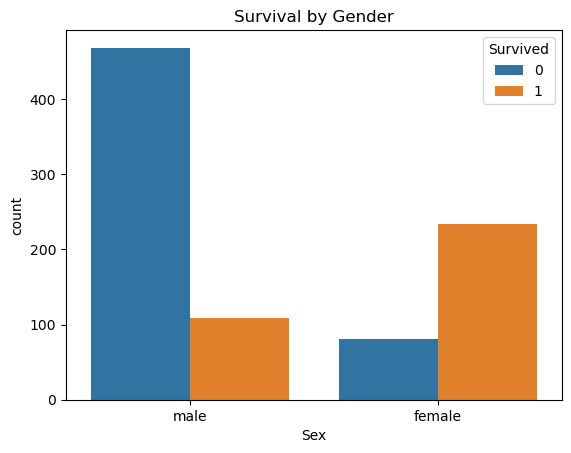

In [218]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


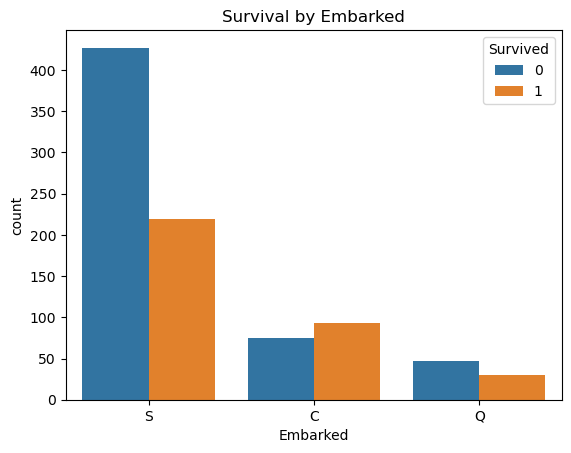

In [219]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')
plt.show()


# Feature Engineering

In [220]:
# Extract title from the Name column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Check unique titles
df['Title'].value_counts()


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

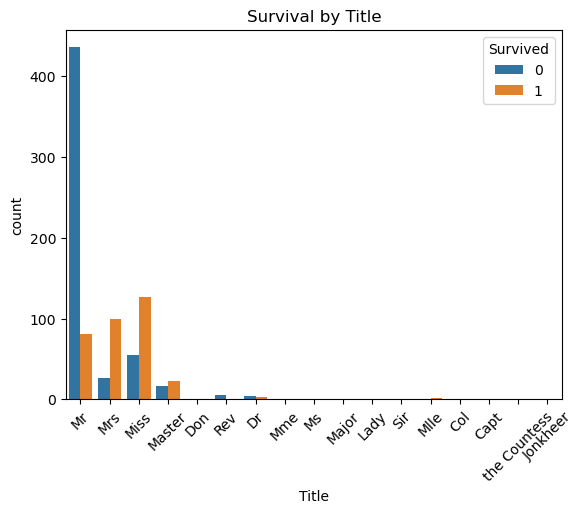

In [221]:
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()


# 7. Modeling (Optional)

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv(r'C:\Users\RebelAshif\Downloads\titanic\train.csv')

# Select useful columns
df_model = df[['Survived', 'Sex', 'Age', 'Fare']].copy()  # <--- Use .copy() to avoid warning

# Handle missing values
df_model['Age'] = df_model['Age'].fillna(df_model['Age'].median())  # <--- No inplace, reassigned

# Encode 'Sex' column
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})

# Separate features and target
X = df_model[['Sex', 'Age', 'Fare']]
y = df_model['Survived']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")



Accuracy: 77.65%
